<a href="https://colab.research.google.com/github/krakowiakpawel9/decision_tree_course/blob/master/04_niedouczenie_vs_przeuczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Niedouczenie i Przeuczenie

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
sns.set(style='darkgrid')

In [8]:
raw_data = make_moons(n_samples=700, noise=0.25)
data = raw_data[0]
target = raw_data[1]

data[:5]

array([[-0.8609862 ,  0.41185733],
       [-0.56714535,  0.82780086],
       [ 0.11053817,  0.56863467],
       [ 1.4312332 , -0.34523027],
       [ 0.02670313, -0.01601018]])

In [9]:
target[:5]

array([0, 0, 0, 1, 1])

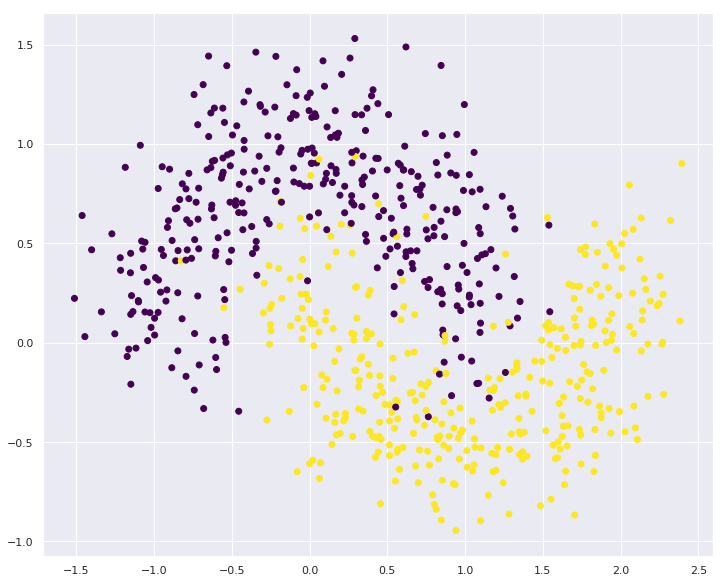

In [10]:
plt.figure(figsize=(12, 10))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')

### Podział na zbiór treningowy i testowy

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


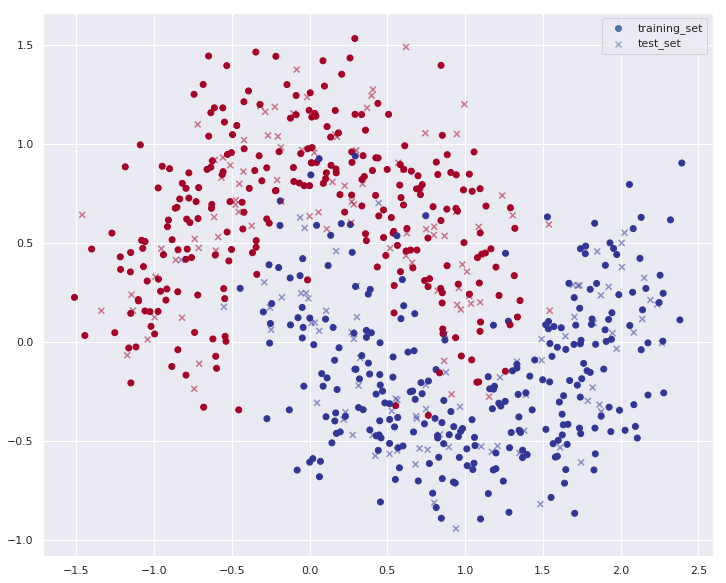

In [51]:
plt.figure(figsize=(12, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.legend()

### Niedouczenie - Regresja Logistyczna

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.866667')

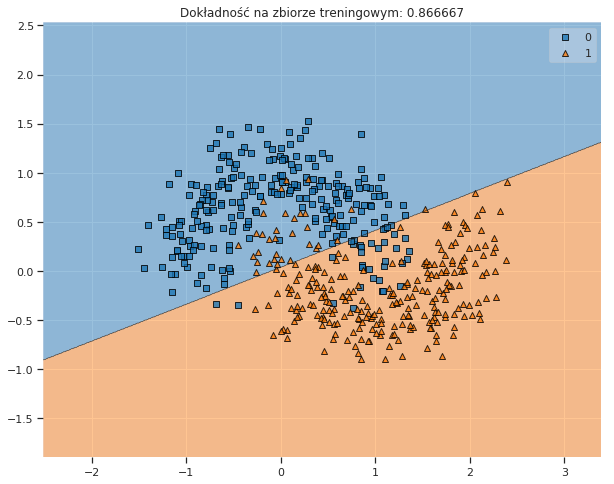

In [60]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, log_reg)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(log_reg.score(X_train, y_train)))

### Zbiór testowy

Dokładność na zbiorze testowym: 0.8228571428571428


Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.822857')

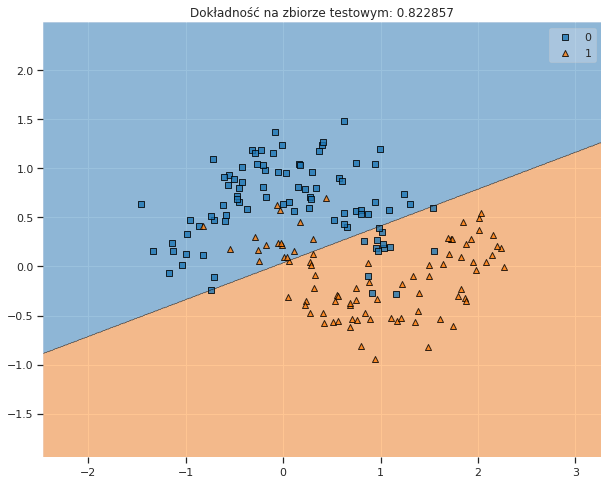

In [59]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, log_reg)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(log_reg.score(X_test, y_test)))

### Niedouczenie - Drzewa Decyzyjne

- Przykład 1

Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.832381')

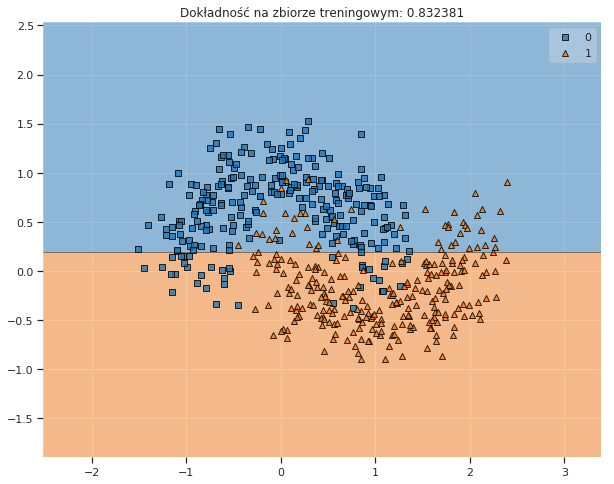

In [66]:
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(tree_clf.score(X_train, y_train)))

Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.788571')

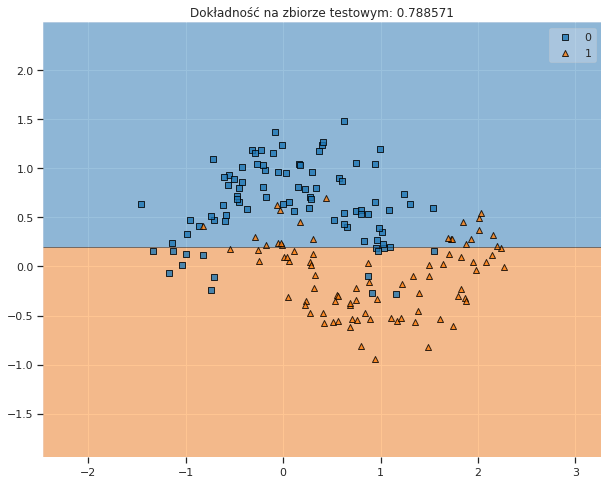

In [67]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(tree_clf.score(X_test, y_test)))

Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 1.000000')

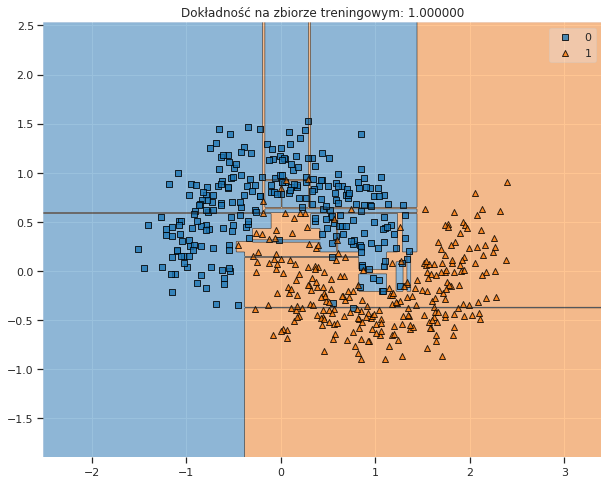

In [68]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(tree_clf.score(X_train, y_train)))

Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.897143')

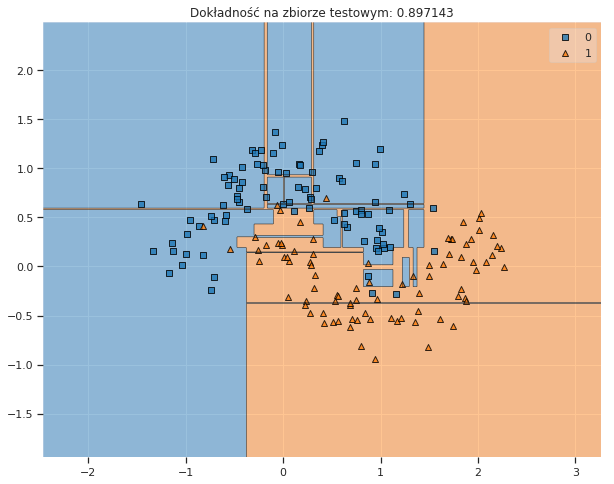

In [69]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(tree_clf.score(X_test, y_test)))

### Wybór optymalnych hiperparametrów

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 5, 10, 15, 20]}

grid_search = GridSearchCV(tree, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

In [77]:
grid_search.fit(X_train, y_train)
 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 5, 10, 15, 20]}

In [78]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.963810')

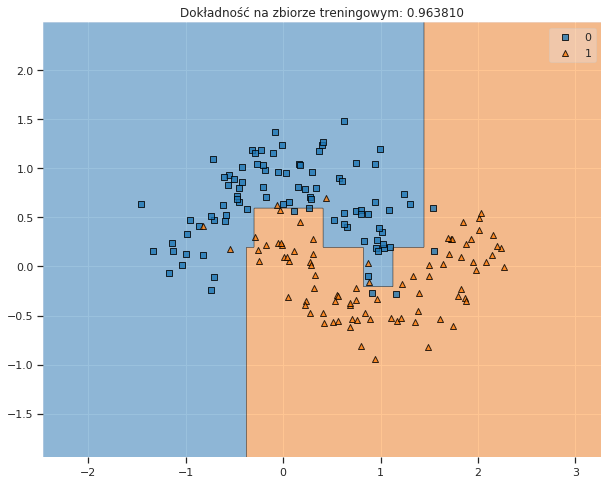

In [80]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(grid_search.score(X_train, y_train)))

Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.937143')

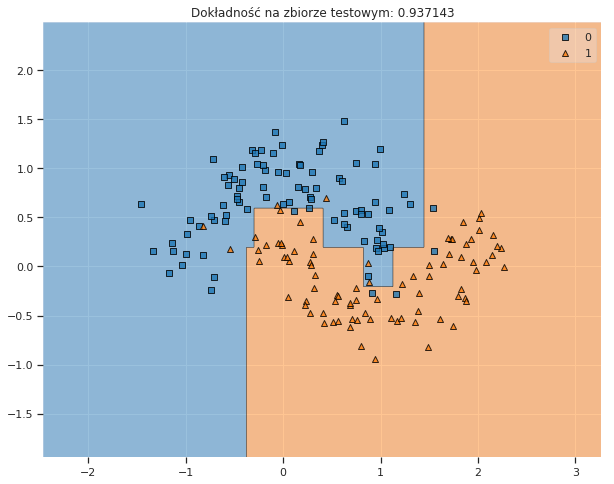

In [81]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(grid_search.score(X_test, y_test)))